In [1]:
import os
from pathlib import Path
from typing import List

import openmm.unit as openmm_unit
import parmed
from openff.toolkit.topology import Molecule
from paprika.build.system.fragmenter import CyclodextrinFragmenter
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
IPythonConsole.molSize = (400, 400)
IPythonConsole.ipython_useSVG = True

## Cyclodextrin Monomer Molecule

In [3]:
cwd = Path().resolve()
derivative_sdf = os.path.abspath(
    os.path.join(cwd, "../../paprika/data/fragments/bcd-methyl.sdf")
)

In [4]:
mol = Molecule.from_file(derivative_sdf)
mol.generate_unique_atom_names()

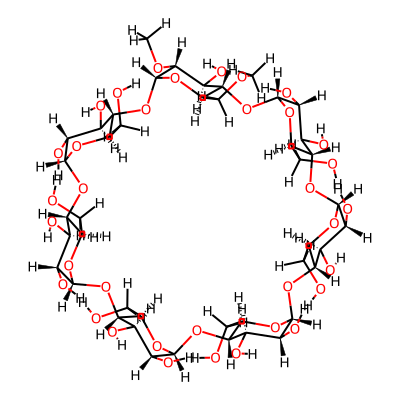

In [5]:
input_mol = mol.to_rdkit()
input_mol

## Glucose Monomer

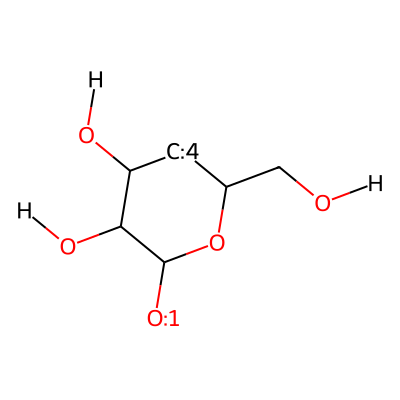

In [6]:
fragment_pure = "[#6]1(-[#8:1])-[#6](-[#8]-[#1])-[#6](-[#8]-[#1])-[#6$([#6]-[#8]):4]-[#6](-[#6]-[#8]-[#1])-[#8]-1"

monomer_pure = Chem.MolFromSmarts(fragment_pure)
monomer_pure

## 2,6-di-O-methyl monomer
**Note**: I labelled the O1 and C4 atoms with '1' and '4' dummy atoms. This necessary to but the bonds in the fragmenter

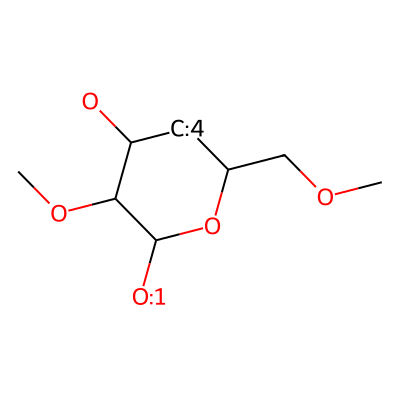

In [7]:
fragment_methyl = "[#6]1(-[#8:1])-[#6](-[#8]-[#6])-[#6](-[#8])-[#6$([#6]):4]-[#6](-[#6]-[#8]-[#6])-[#8]-1"

monomer_methyl = Chem.MolFromSmarts(fragment_methyl)
monomer_methyl

## Assign Partial Charges

In [8]:
# Create an instance of the fragmenter
cyclodextrin = CyclodextrinFragmenter(input_mol)
cyclodextrin.add_monomer(monomer_pure)
cyclodextrin.add_monomer(monomer_methyl)

In [9]:
# Assign AM1-BCC partial charges
cyclodextrin.assign_partial_charges(partial_charge_method="am1bcc")

In [10]:
# Save molecule with partial charges to file
cyclodextrin.to_file("bcd-methyl.am1bcc.sdf", file_format="SDF")
cyclodextrin.to_file("bcd-methyl.am1bcc.mol2", file_format="MOL2")
cyclodextrin.to_file("bcd-methyl.am1bcc.pdb", file_format="PDB")